# jupyter-diff

From Jupyter Lab Open Studio! (at Bloomberg HQ)

Kunal Marwaha
and Saul
Shanabrook // June 22 2019

This is an experiment in using version
control for Jupyter notebooks, using the
tool
[notedown](https://github.com/aaren/notedown) to automatically store
notebooks
in Markdown.

In [2]:
print("I ❤ Jupyter!")

I ❤ Jupyter!


## Why

Jupyter is a great tool for creating *notebooks* (`.ipynb` files). With
notebooks, one can explore new computational ideas and share narratives with
code. 

Ideas can change, and many turn to a form of version control to track
changes.

![PhD Comics by Jorge Cham](phd101212s.png)

However, the underlying
format
of notebooks is
JSON. It is relatively difficult to see changes to JSON
objects
in classic tools
like [diff][diff].
There is still
not consensus on how
to put Jupyter
notebooks in version control.
See
[here][j1], 
[here][j2],
and
[here][j3],
with
varied solutions like
[nbdime](https://nbdime.readthedocs.io/en/latest/),
[nbstripout](https://github.com/kynan/nbstripout), or
[jupytext](https://github.com/mwouts/jupytext). 

Here, I will use
[notedown](https://github.com/aaren/notedown) to work with `.md` files in
Jupyter Lab, and use [git](https://git-scm.com/) for version control.
[diff]:http://man7.org/linux/man-pages/man1/diff.1.html
[j1]:https://stackoverflow.com/q/18734739

[j2]:http://tiny.cc/7ofo8y
[j3]:http://tiny.cc/fofo8y

In [5]:
bool("Markdown") and bool("Jupyter")

True

## Setup
First, boot up Jupyter Lab.

Let's install notedown [directly from the
notebook][jakevdp]:

[jakevdp]:http://tiny.cc/onfo8y

In [3]:
import sys
!{sys.executable} -m pip install numpy

You are using pip version 19.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


<br/>

Now, we'll add the below line to your Jupyter settings:

In [5]:
LINE_TO_ADD = "c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'"

In [8]:
%store LINE_TO_ADD >> ~/.jupyter/jupyter_notebook_config.py

Writing 'LINE_TO_ADD' (str) to file '/Users/kmarwaha/.jupyter/jupyter_notebook_config.py'.


<br/>

If you're following along, you can relaunch Jupyter, and create a new
Markdown
file. Once you create the file,
right-click and `Open With ->
Notebook`.
!["Open With" image](open-with.png)

## Issues
Not everything is
perfect. Here are the issues I've seen:
1. **Links
wrap, and occasionally get
spaces added to them.** This is from 80-character
line limits in Markdown
format. Some links will be broken because of this. One
partial solution is to
reference links (see examples [here][mdcheat]).
You can also use URL shortening
services like http://tiny.cc.

2. **Sometimes, Markdown cells
get pasted
together.** It can be easier to edit
Markdown cells in smaller
chunks. To
separate them, I sometimes add little code
snippets.

3. **GitHub
doesn't render
the markdown as a notebook!** Maybe if
more people use it, they
can try it out.
As a compromise, I converted to
notebook-output.ipynb for you to
read online :)
This was done with 
`notedown notebook.md > notebook-output.ipynb`

[mdcheat]:
https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

In [26]:
for i in range(3):
    print("~"*9 + (":-)" if i==1 else "~~~") + "~"*9)

~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~:-)~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~


## Sample project
Let's look at some GeoJSON data in San Francisco.

In [57]:
import json
data = None
with open('san-francisco.geojson') as json_file:  
    data = json.load(json_file)


We can see a list of neighborhoods (at least, according to this dataset):

In [58]:
## get a list of neighborhoods
for i in range(len(data['features'])):
    print(data['features'][i]['properties']['name'])

Seacliff
Marina
Pacific Heights
Nob Hill
Presidio Heights
Downtown/Civic Center
Excelsior
Bernal Heights
Western Addition
Chinatown
North Beach
Haight Ashbury
Outer Mission
Crocker Amazon
West of Twin Peaks
South of Market
Potrero Hill
Inner Richmond
Bayview
Noe Valley
Inner Sunset
Diamond Heights
Lakeshore
Russian Hill
Treasure Island/YBI
Twin Peaks
Outer Richmond
Visitacion Valley
Golden Gate Park
Parkside
Financial District
Ocean View
Mission
Presidio
Castro/Upper Market
Outer Sunset
Glen Park


Now let's install GeoPandas!

In [75]:
import sys
!{sys.executable} -m pip install geopandas descartes

You are using pip version 19.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Ok! Let's use it!

In [79]:
import descartes
import geopandas as gpd
import matplotlib.pyplot as plt
file = gpd.read_file('san-francisco.geojson')
file.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Seacliff,1,2013-02-10T05:44:04,2013-02-10T05:44:04,"(POLYGON ((-122.484089 37.78791, -122.484346 3..."
1,Marina,20,2013-02-10T05:44:04,2013-02-10T05:44:04,"(POLYGON ((-122.446806 37.805401, -122.44678 3..."
2,Pacific Heights,23,2013-02-10T05:44:04,2013-02-10T05:44:04,"(POLYGON ((-122.446825 37.787251, -122.447228 ..."
3,Nob Hill,25,2013-02-10T05:44:04,2013-02-10T05:44:04,"(POLYGON ((-122.418609 37.78891, -122.421954 3..."
4,Presidio Heights,29,2013-02-10T05:44:04,2013-02-10T05:44:04,"(POLYGON ((-122.4626 37.789041, -122.460923 37..."


We can also see nice maps :-)

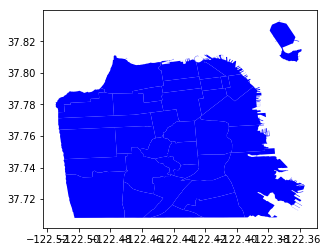

In [82]:
ax = file.plot(color='blue')

## Thanks!

Check out the latest [Jupyter Lab
interface](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html)
for working with notebooks in a friendly, responsive way.